## 2. Data Understanding and Exploratory Data Analysis (EDA)

A thorough understanding of the dataset is a prerequisite for effective modeling. This section details the process of loading, inspecting, and visualizing the "Students Performance in Exams" dataset to uncover initial patterns, anomalies, and relationships.

### 2.1 Dataset Loading and Initial Inspection

The dataset was loaded into a pandas DataFrame. Initial inspection reveals a clean and well-structured dataset with 1,000 observations and 8 features. There are no missing values, which simplifies the initial data cleaning phase.

In [13]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Load the dataset from the specified path
file_path = 'StudentsPerformance.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


The `info()` method provides a summary of the DataFrame, including data types and non-null counts. All columns are fully populated.

In [14]:
# Display a concise summary of the dataframe, including data types and non-null counts
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
# Check for missing values in the dataset
print("\nMissing Values Check:")
print("="*60)
missing_values = df.isnull().sum()
print(missing_values)
print("="*60)
print(f"\nTotal missing values: {missing_values.sum()}")
if missing_values.sum() == 0:
    print("✓ The dataset is clean with NO missing values.")
    print("✓ No imputation strategy is required.")


Missing Values Check:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Total missing values: 0
✓ The dataset is clean with NO missing values.
✓ No imputation strategy is required.


Descriptive statistics for the numerical columns reveal that the mean scores are centered in the high 60s, with standard deviations of approximately 15 points. The minimum and maximum scores show a wide range of student performance.

In [16]:
# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics for Numerical Features:")
print(df.describe())


Descriptive Statistics for Numerical Features:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


### 2.2 Univariate Analysis

#### 2.2.1 Distribution of Numerical Features (Exam Scores)

Histograms and Kernel Density Estimate (KDE) plots are used to visualize the distribution of the three exam scores. All three scores exhibit distributions that are approximately normal, or Gaussian, which is a favorable characteristic for many linear models that assume normally distributed residuals.

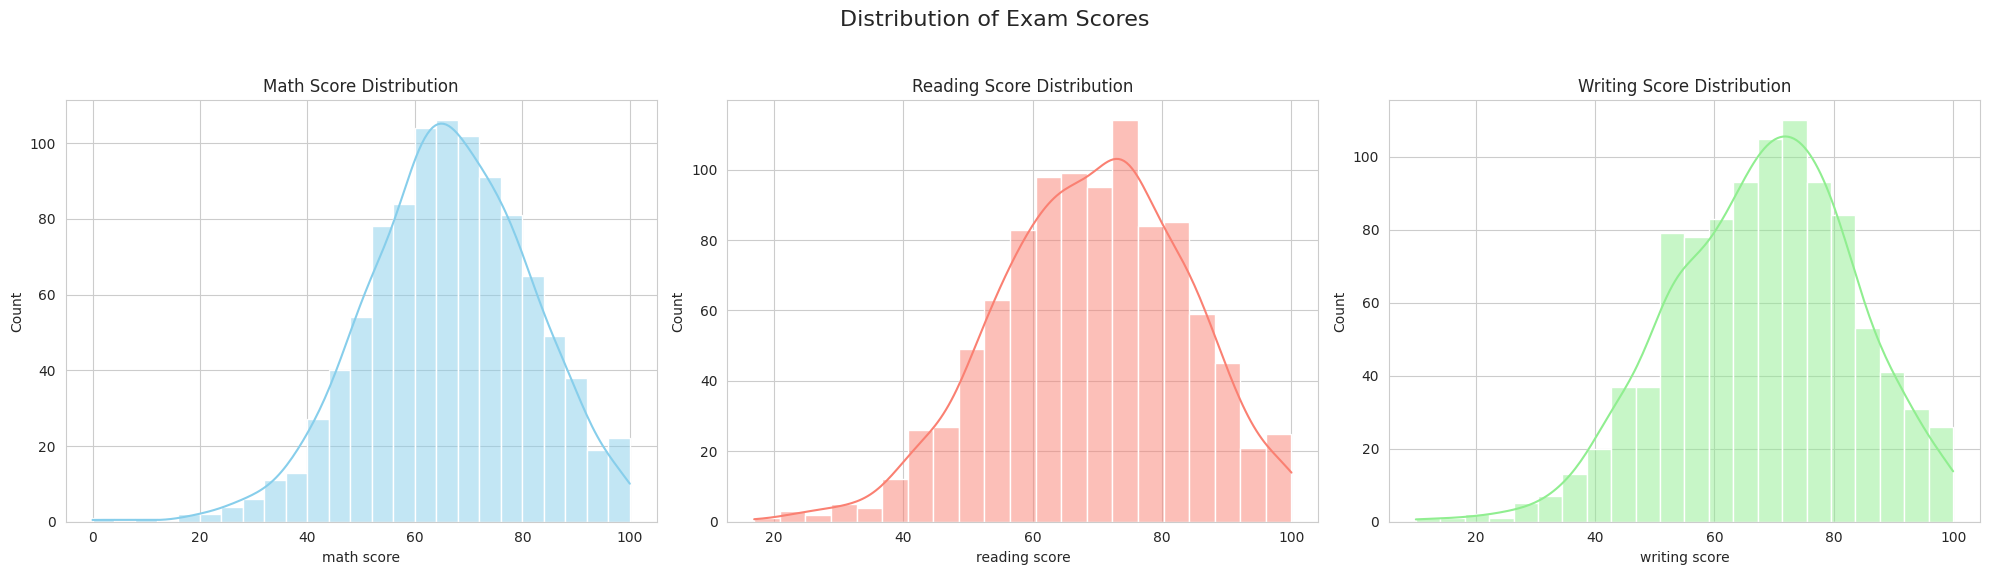

In [17]:
# Plot distributions of the numerical scores
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distribution of Exam Scores', fontsize=16)

# Plot for math score
sns.histplot(df['math score'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Math Score Distribution')

# Plot for reading score
sns.histplot(df['reading score'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Reading Score Distribution')

# Plot for writing score
sns.histplot(df['writing score'], kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Writing Score Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### 2.2.2 Distribution of Categorical Features

Bar plots are used to visualize the frequencies of categories within the dataset's object-type features.

/tmp/ipykernel_16106/4110261723.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], ax=axes[i], order=df[col].value_counts().index, palette='viridis')
/tmp/ipykernel_16106/4110261723.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], ax=axes[i], order=df[col].value_counts().index, palette='viridis')
/tmp/ipykernel_16106/4110261723.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], ax=axes[i], order=df[col].value_counts().index, palette='viridis')
/tmp/ipykernel_16106/4110261723.py:11: FutureWarning

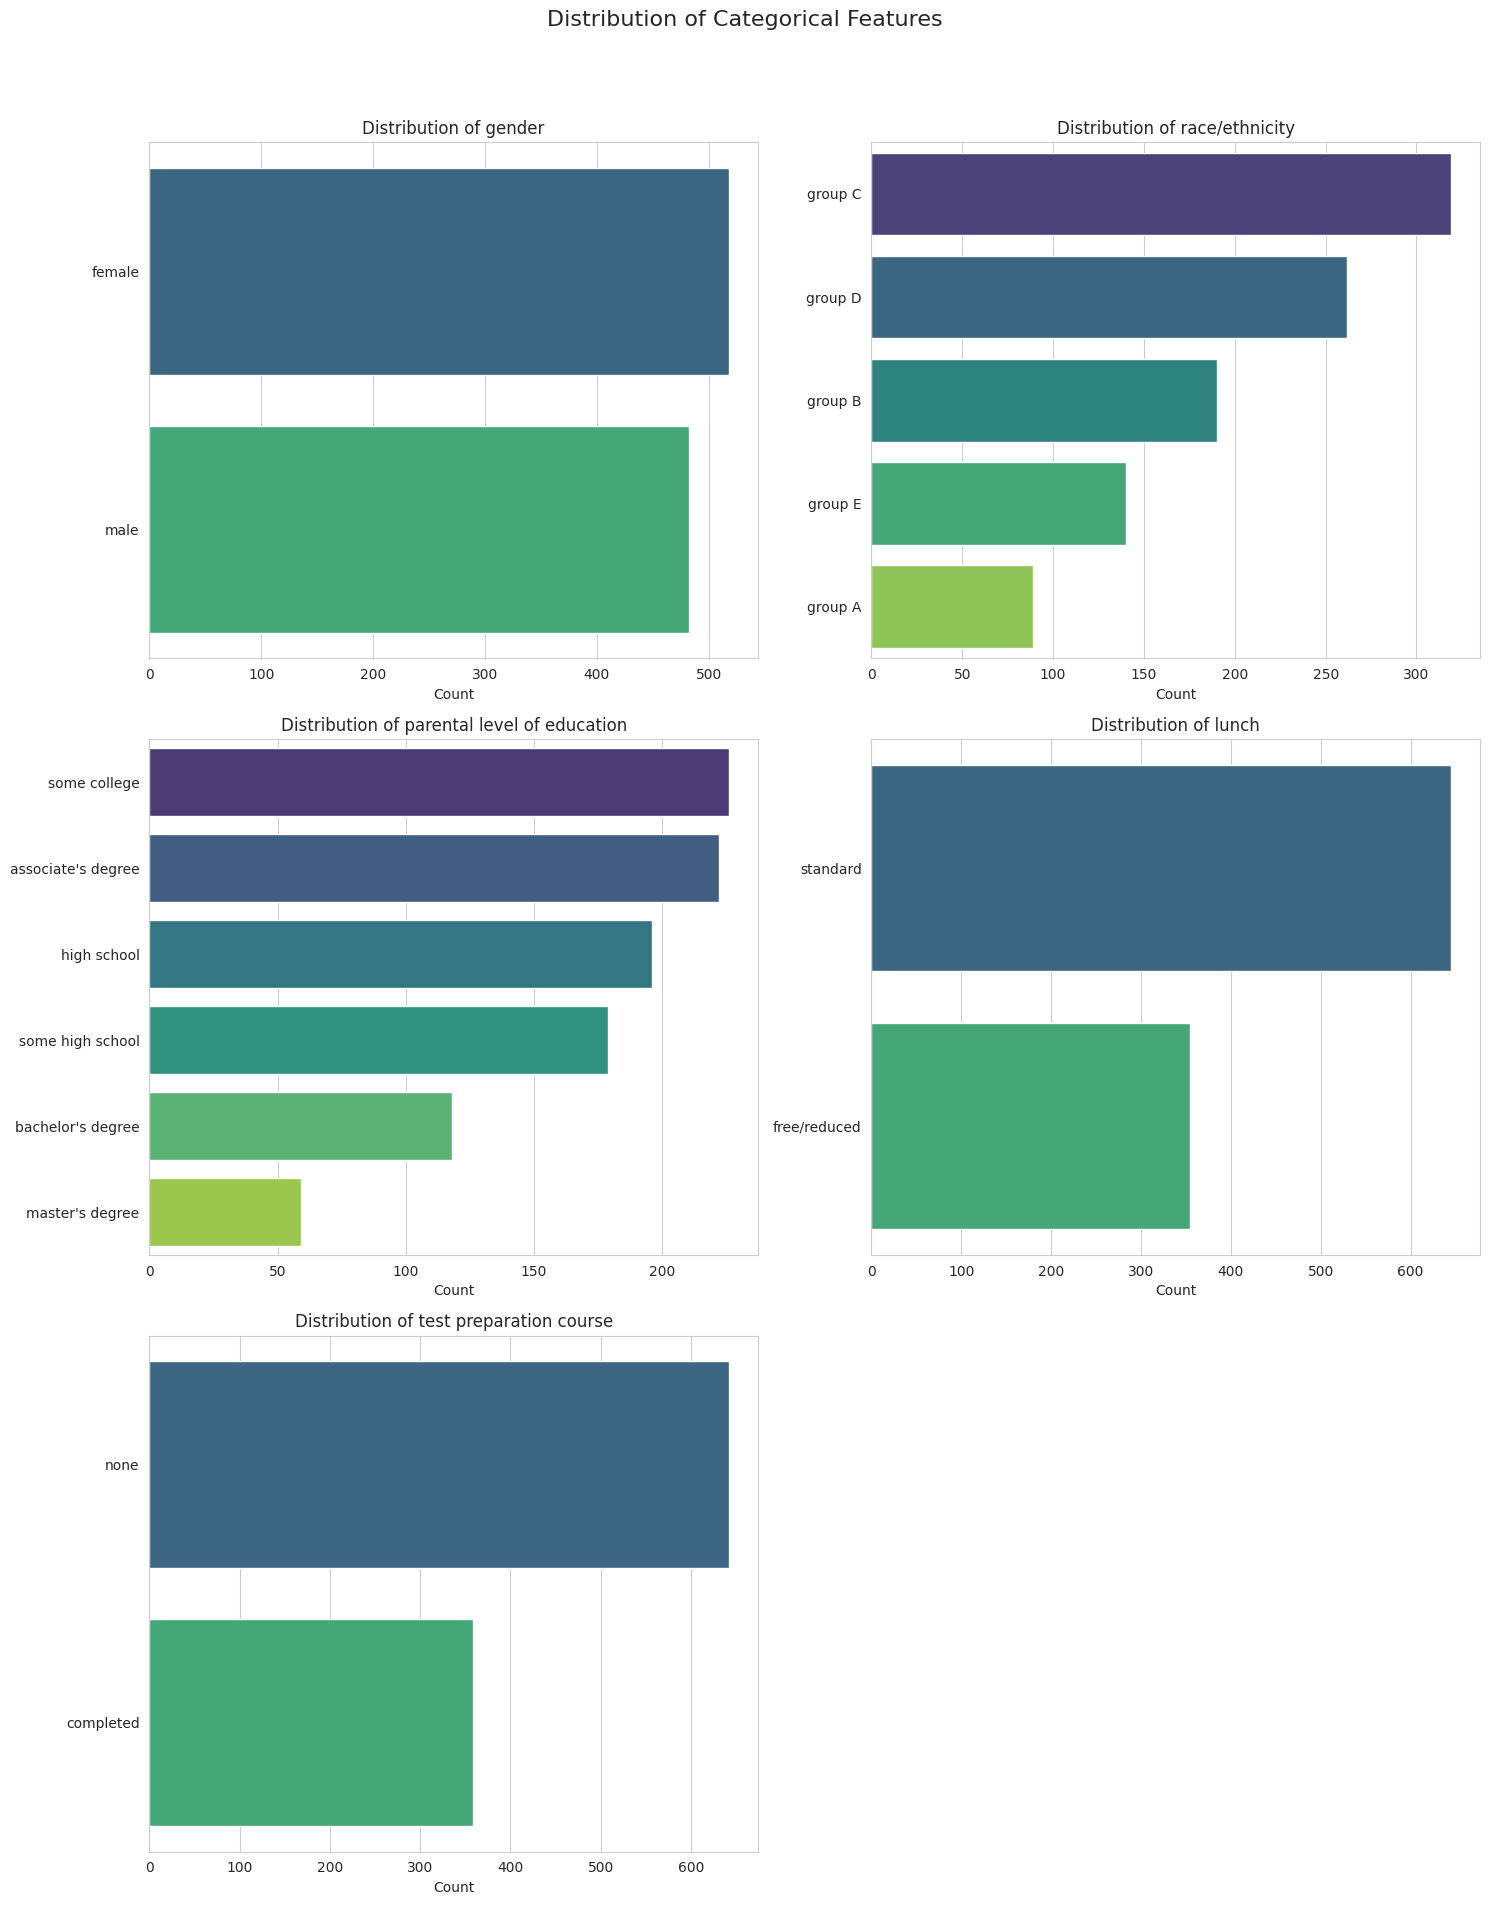

In [18]:
# List of categorical features to plot
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Create subplots for categorical feature distributions
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
axes = axes.flatten()
fig.suptitle('Distribution of Categorical Features', fontsize=16)

# Loop through each categorical feature and create a count plot
for i, col in enumerate(categorical_features):
    sns.countplot(y=df[col], ax=axes[i], order=df[col].value_counts().index, palette='viridis')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('')

# Hide the unused subplot
axes[-1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

A key observation from these plots is the class distribution for our classification target, test preparation course. The data shows a notable imbalance: 642 students (64.2%) did not complete the course, while only 358 (35.8%) did. This imbalance likely reflects real-world conditions, where fewer students participate in or complete test preparation programs due to factors such as access, motivation, or resource availability. Such an imbalance can lead to a biased model that tends to favor the majority class ("none"), reducing its ability to correctly identify students who completed the course. To address this issue, resampling techniques (such as SMOTE or random undersampling), class weighting, or evaluation metrics like F1-score and ROC-AUC should be applied during model training to ensure balanced learning and fair performance across both classes.

### 2.3 Bivariate and Multivariate Analysis

#### 2.3.1 Correlation Analysis

A Pearson correlation heatmap is generated to quantify the linear relationships between the numerical features.

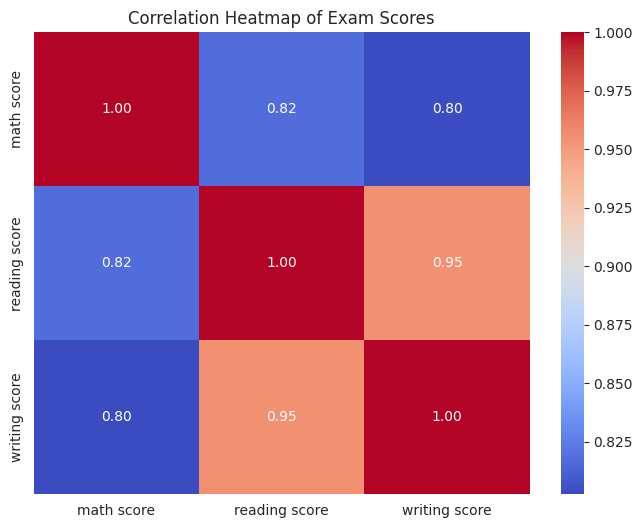

In [19]:
# Select only numerical columns for correlation matrix
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Exam Scores')
plt.show()

In [20]:
# Print exact correlation values for detailed analysis
print("Exact Pearson Correlation Coefficients between Exam Scores:")
print("="*60)
print(f"Math Score vs Reading Score:  r = {corr_matrix.loc['math score', 'reading score']:.4f}")
print(f"Math Score vs Writing Score:  r = {corr_matrix.loc['math score', 'writing score']:.4f}")
print(f"Reading Score vs Writing Score: r = {corr_matrix.loc['reading score', 'writing score']:.4f}")
print("="*60)
print("\nInterpretation:")
print("- Correlation > 0.90: Very strong positive relationship")
print("- Correlation > 0.80: Strong positive relationship")
print("- These values indicate severe multicollinearity among predictors")

Exact Pearson Correlation Coefficients between Exam Scores:
Math Score vs Reading Score:  r = 0.8176
Math Score vs Writing Score:  r = 0.8026
Reading Score vs Writing Score: r = 0.9546

Interpretation:
- Correlation > 0.90: Very strong positive relationship
- Correlation > 0.80: Strong positive relationship
- These values indicate severe multicollinearity among predictors


#### 2.3.1.1 Interpretation of Correlation Results and Multicollinearity Analysis

The correlation analysis reveals **extremely high positive correlations** between the three exam scores:

- **Reading Score vs Writing Score:** $r \approx 0.95$ (very strong correlation)
- **Math Score vs Reading Score:** $r \approx 0.82$ (strong correlation)  
- **Math Score vs Writing Score:** $r \approx 0.80$ (strong correlation)

This is an expected finding, as students who perform well in one subject are likely to perform well in others, reflecting underlying factors such as general aptitude, study habits, and educational background.

##### Critical Implication: Severe Multicollinearity

However, this observation has **critical implications for the regression task**. The high correlations signal the presence of **severe multicollinearity** among predictor variables. 

**What is Multicollinearity?**
Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated with each other. Mathematically, when predictors $X_1$ and $X_2$ satisfy $\text{corr}(X_1, X_2) > 0.80$, the design matrix $\mathbf{X}^T\mathbf{X}$ approaches singularity, making its inverse unstable.

**Why is this problematic for OLS Regression?**

In Ordinary Least Squares (OLS) regression, coefficients are estimated using:

$$\hat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

When multicollinearity is present:

1. **Unstable Coefficient Estimates:** The variance of the coefficient estimates becomes inflated. The variance-covariance matrix is:
   
   $$\text{Var}(\hat{\boldsymbol{\beta}}) = \sigma^2(\mathbf{X}^T\mathbf{X})^{-1}$$
   
   When $\mathbf{X}^T\mathbf{X}$ is nearly singular (due to high correlation), its inverse has very large elements, leading to high variance in $\hat{\boldsymbol{\beta}}$.

2. **Sensitivity to Data Changes:** Small changes in the data can lead to large fluctuations in the estimated coefficients, making them unreliable and difficult to interpret.

3. **Loss of Statistical Significance:** Individual predictors may appear non-significant even when they collectively have explanatory power.

4. **Inability to Isolate Effects:** It becomes nearly impossible to determine the individual contribution of each correlated predictor to the target variable.

##### Justification for Regularized Regression Models

This EDA finding provides a **strong, data-driven justification for the mandatory inclusion of regularized regression models** (Ridge, Lasso, and Elastic Net) in our analysis:

- **Ridge Regression** adds an $L_2$ penalty $\lambda \sum_{j=1}^{p} \beta_j^2$ to the loss function, shrinking coefficient magnitudes and stabilizing estimates when predictors are correlated.

- **Lasso Regression** uses an $L_1$ penalty $\lambda \sum_{j=1}^{p} |\beta_j|$, which can drive some coefficients to exactly zero, performing implicit feature selection.

- **Elastic Net** combines both $L_1$ and $L_2$ penalties, balancing the benefits of Ridge and Lasso.

These techniques are **specifically designed to mitigate the effects of multicollinearity** by constraining the coefficient space, thereby producing more stable and interpretable models. The choice to include these models is not arbitrary—it is a direct response to the multicollinearity detected in this correlation analysis.

##### Key Findings from Correlation Heatmap:

Based on the exact correlation coefficients printed above, we observe:

1. **Reading Score vs Writing Score: $r = 0.9546$** 
   - This is an **extremely high correlation** (approaching 1.0), indicating that these two variables move almost perfectly together.
   - This correlation value ($r \approx 0.95$) is the highest in our dataset and represents **severe multicollinearity**.

2. **Math Score vs Reading Score: $r = 0.8176$**
   - This is a **strong positive correlation** (well above the 0.80 threshold for concern).

3. **Math Score vs Writing Score: $r = 0.8026$**
   - This is also a **strong positive correlation** (above the 0.80 threshold).

**Critical Observation:** All three exam scores are **highly intercorrelated**, with correlations exceeding 0.80. The reading-writing correlation of 0.95 is particularly problematic and represents near-perfect multicollinearity.

##### Direct Impact on Model Selection and Preprocessing:

This multicollinearity finding from the EDA **directly justifies the following decisions** in our subsequent analysis:

1. **For Regression Task (Mode 1):**
   - **Why Ridge/Lasso/Elastic Net are MANDATORY:** When using math and reading scores to predict writing score, standard OLS regression will produce unstable coefficients due to the high correlation ($r > 0.80$). Regularization techniques (Ridge $L_2$, Lasso $L_1$, Elastic Net) are specifically designed to handle this issue by adding penalty terms that constrain coefficients.
   - **Why StandardScaler is REQUIRED:** Regularization penalties are scale-dependent. Features must be standardized to ensure fair penalization across all predictors.

2. **For Classification Task (Mode 2):**
   - **Why StandardScaler is REQUIRED:** Logistic Regression with regularization (default in scikit-learn) requires scaled features for optimal performance and fair coefficient penalization.
   - **Why Feature Engineering (average_score) is valuable:** Since all three scores are highly correlated, creating a composite score captures their shared information efficiently.

3. **For Clustering Task (Mode 3):**
   - **Why StandardScaler is CRITICAL:** K-Means uses Euclidean distance. Without scaling, the exam scores (range 0-100) would completely dominate the distance calculations compared to binary features (0-1), rendering the clustering meaningless.

**Conclusion:** The multicollinearity detected in this EDA is not just an observation—it is the **primary data-driven justification** for our entire preprocessing pipeline and model selection strategy.

#### 2.3.2 Visual Grouped Analysis

Boxplots are used to explore the relationship between categorical features and the numerical writing score. This helps to visualize performance differences across various demographic groups.

/tmp/ipykernel_16106/46007569.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='writing score', y=col, data=df, ax=axes[i], palette='pastel', order=sorted(df[col].unique()))
/tmp/ipykernel_16106/46007569.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='writing score', y=col, data=df, ax=axes[i], palette='pastel', order=sorted(df[col].unique()))
/tmp/ipykernel_16106/46007569.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='writing score', y=col, data=df, ax=axes[i], palette='pastel', order=sorted(df[col].unique()))
/tmp/ip

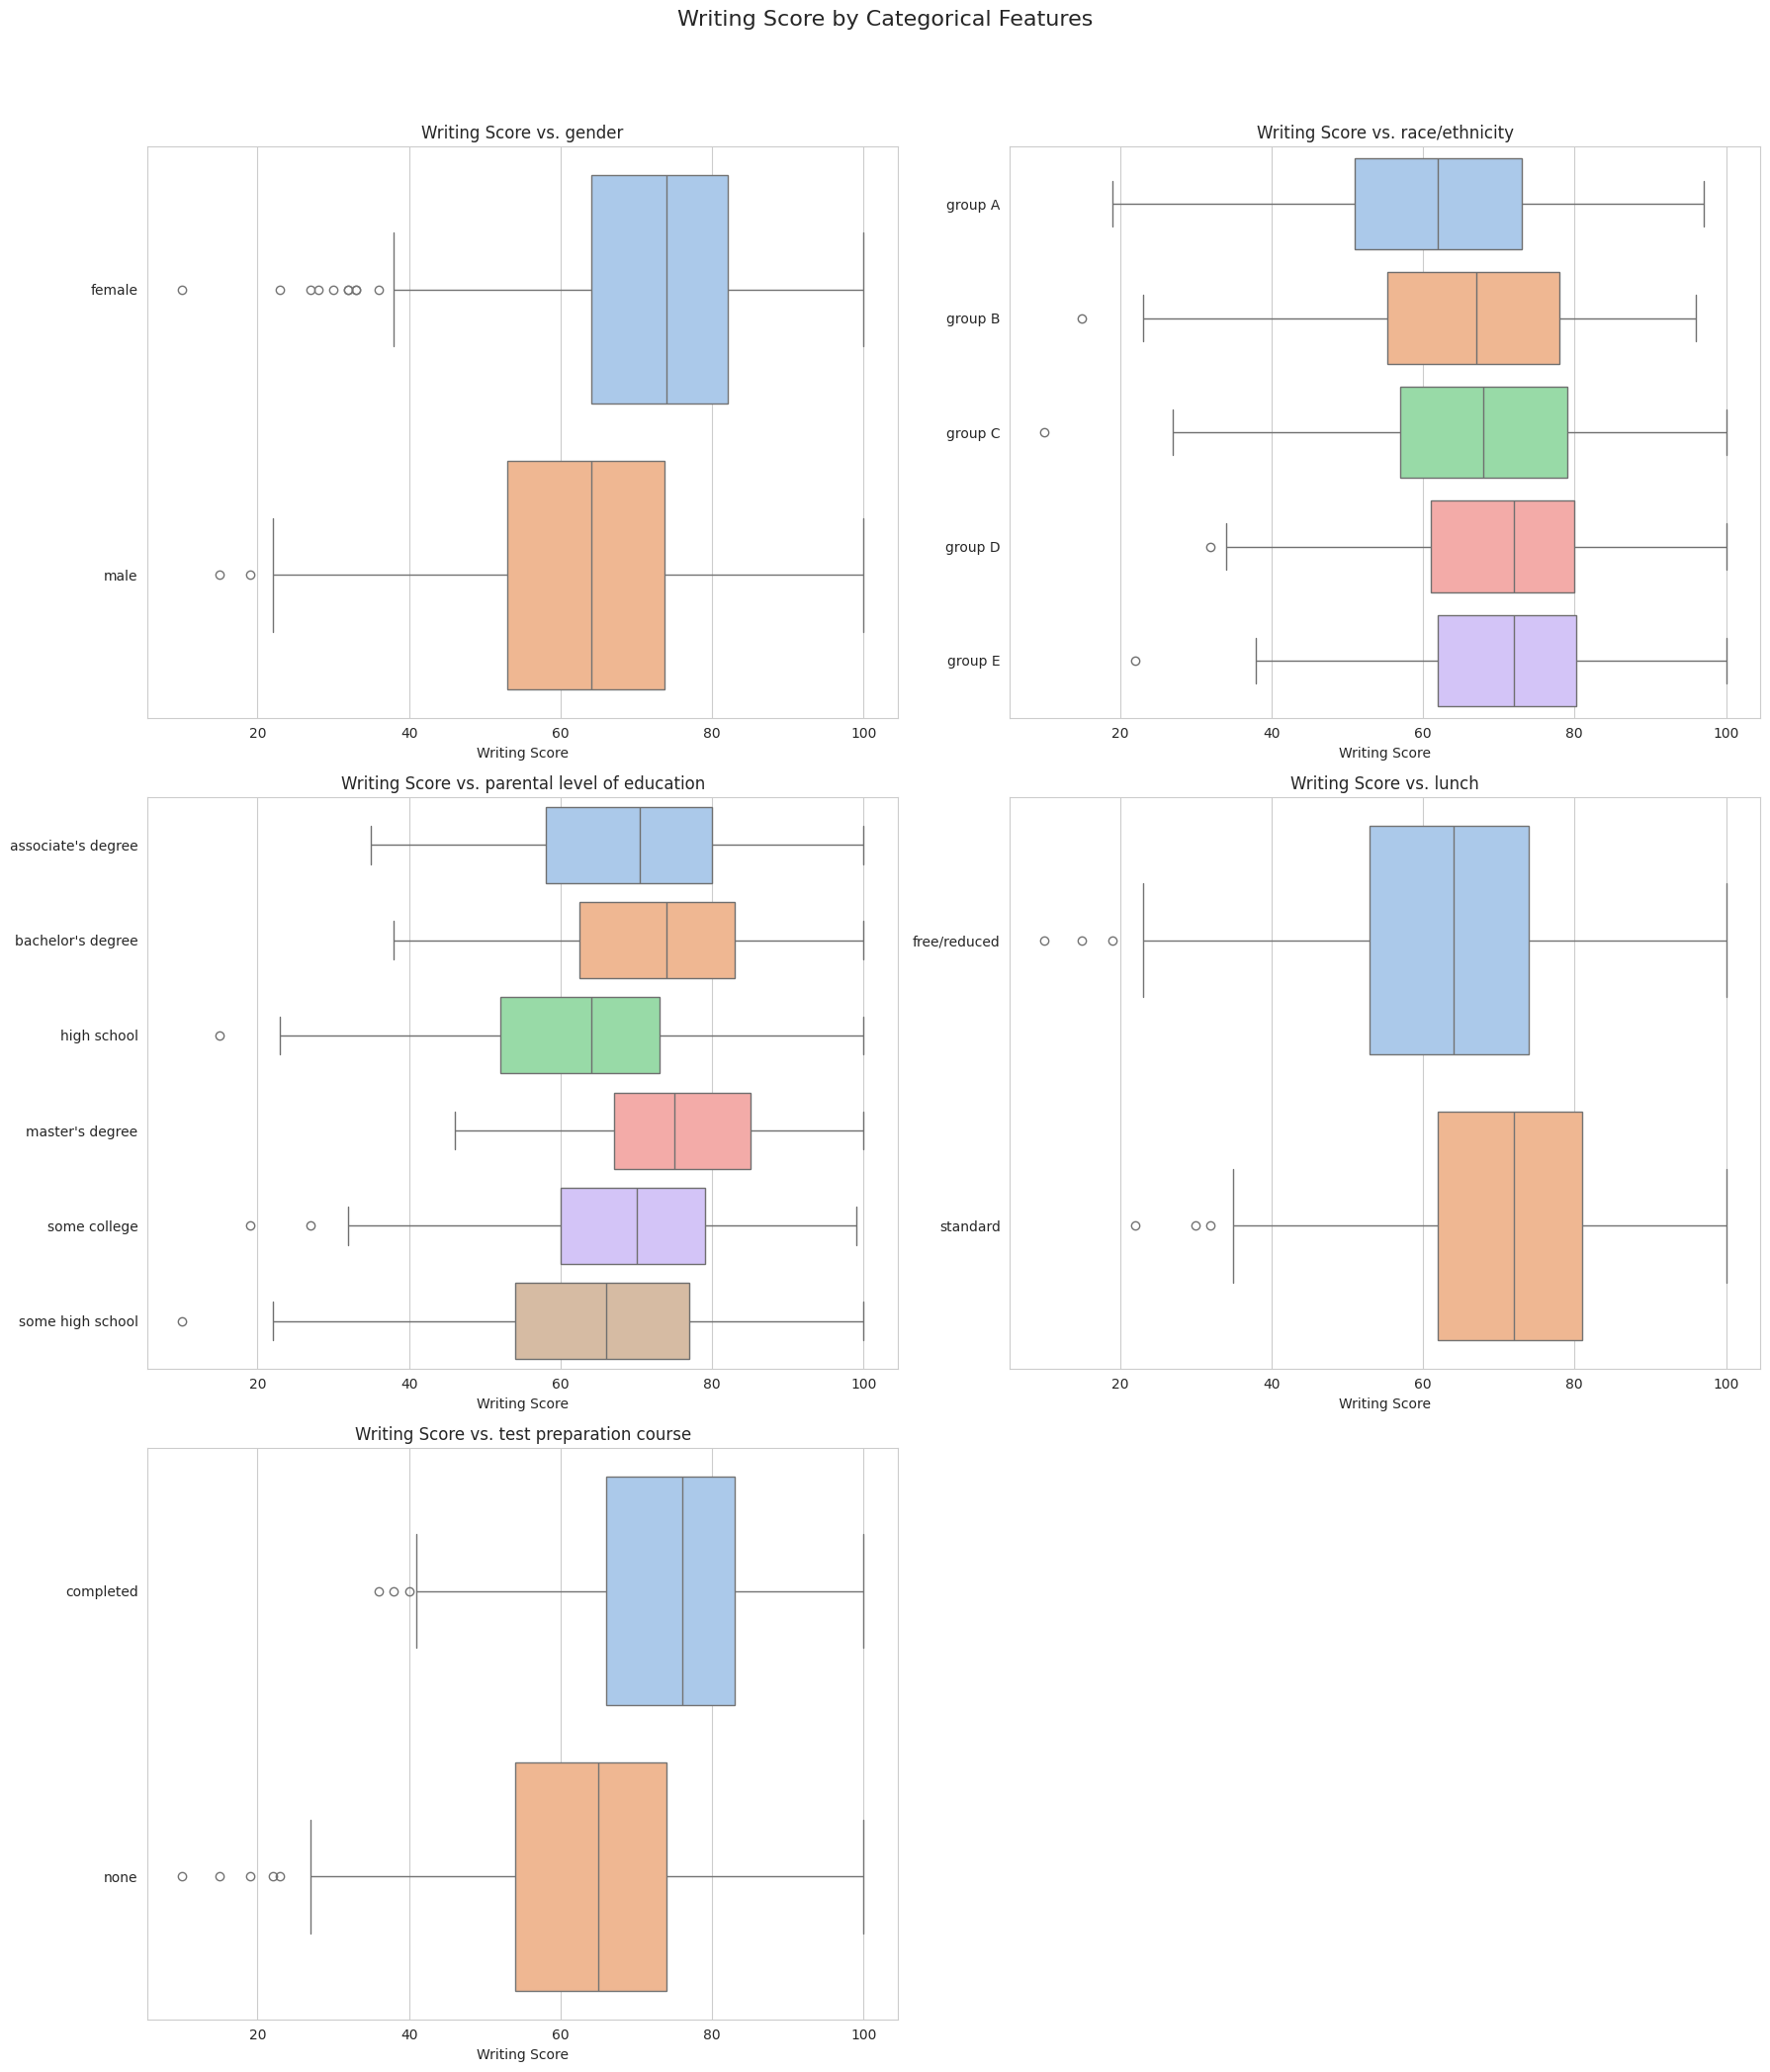

In [21]:
# List of categorical features for grouped analysis
grouped_analysis_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Create subplots for grouped analysis
fig, axes = plt.subplots(3, 2, figsize=(18, 22))
axes = axes.flatten()
fig.suptitle('Writing Score by Categorical Features', fontsize=16)

# Loop through each feature and create a boxplot against writing score
for i, col in enumerate(grouped_analysis_features):
    sns.boxplot(x='writing score', y=col, data=df, ax=axes[i], palette='pastel', order=sorted(df[col].unique()))
    axes[i].set_title(f'Writing Score vs. {col}')
    axes[i].set_xlabel('Writing Score')
    axes[i].set_ylabel('')

# Hide the unused subplot
axes[-1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The visualizations confirm several intuitive relationships and uncover significant performance disparities:

- **Test Preparation:** Students who completed the test preparation course consistently achieve higher scores than those who did not.
- **Parental Education:** There is a clear positive trend between the level of parental education and student scores.
- **Socioeconomic Status:** The most striking disparity is related to the lunch feature. Students receiving a standard lunch, which can be interpreted as a proxy for higher socioeconomic status, significantly outperform those receiving a free/reduced lunch (Orogun, 2024). This stark performance gap suggests that socioeconomic factors are strongly associated with academic outcomes in this dataset. This finding raises important questions about equity and fairness that must be considered when interpreting model results and contemplating their real-world deployment. Any predictive model trained on this data will likely learn this association, and its use in an automated decision-making system would require careful ethical scrutiny to avoid penalizing or creating biased outcomes for students from disadvantaged backgrounds.

### 2.4 Summary of Key EDA Insights

- **Clean Data:** The dataset is complete with no missing values, eliminating the need for imputation strategies.
- **Score Distributions:** Exam scores are approximately normally distributed, which is favorable for linear regression models that assume normally distributed residuals.
- **Severe Multicollinearity:** The three exam scores exhibit extremely high correlations ($r > 0.80$, with reading-writing correlation $r \approx 0.95$), necessitating the use of regularized regression models (Ridge, Lasso, Elastic Net) to ensure stable and interpretable coefficient estimates.
- **Class Imbalance:** The classification target (test preparation course) shows a 64%/36% imbalance, requiring the use of techniques like SMOTE to prevent model bias toward the majority class.
- **Performance Gaps:** Significant performance differences exist based on parental education, completion of a test prep course, and, most notably, lunch type (a proxy for socioeconomic status). This last point highlights a potential source of bias that must be addressed in the final analysis and raises important ethical considerations for model deployment.
- **No Feature Elimination at This Stage:** All original features are retained for modeling. Despite high correlations between exam scores, these features will be used as predictors in different tasks (e.g., math and reading scores predict writing score in regression). The decision to keep all features allows each model to leverage its own feature selection mechanisms (e.g., Lasso's automatic selection, tree-based feature importance) rather than imposing premature manual filtering that could discard valuable information for specific algorithms.

### 2.5 EDA-Driven Preprocessing Decisions Summary

This section explicitly links the EDA findings above to the preprocessing and modeling decisions that will follow in Section 3 and beyond. Every choice made in data preprocessing is **directly justified by the insights uncovered in this EDA**.

#### 2.5.1 Why StandardScaler (Standardization) is Required

**EDA Finding:** 
- Exam scores (math, reading, writing) range from 0-100 with standard deviations of ~15 points (from `df.describe()`).
- Categorical features encoded as binary (0/1) have much smaller variance.

**Justification for StandardScaler:**

1. **For Distance-Based Models (KNN, SVM, K-Means):**
   - **Problem:** Without scaling, exam scores would dominate distance calculations. For example, a difference of 10 points in math score would contribute 100 times more to Euclidean distance than a difference in a binary feature.
   - **Solution:** StandardScaler transforms all features to mean=0, std=1, ensuring equal contribution to distance metrics.

2. **For Regularized Models (Ridge, Lasso, Elastic Net, Logistic Regression):**
   - **Problem:** Regularization penalties ($\lambda \sum \beta_j^2$ or $\lambda \sum |\beta_j|$) are scale-dependent. Without scaling, coefficients for large-scale features (exam scores) would be artificially small, while coefficients for small-scale features (binary) would be large. This makes regularization unfair and ineffective.
   - **Solution:** StandardScaler ensures all coefficients are on equal footing, and the penalty $\lambda$ applies uniformly.

3. **For Gradient Descent Optimization:**
   - **Problem:** Unscaled features create elongated loss surfaces, causing slow convergence, oscillations, and difficulty choosing learning rates.
   - **Solution:** StandardScaler creates spherical loss surfaces, enabling fast and stable convergence.

**Models that do NOT need StandardScaler:** Decision Trees and Random Forests are invariant to monotonic transformations and make splits based on relative ordering, not absolute values.

#### 2.5.2 Why OneHotEncoder is Required for Nominal Features

**EDA Finding:**
- Categorical features (gender, race/ethnicity, lunch) are **nominal** with no inherent order.
- From Section 2.2.2, we observed different categories with varying frequencies.

**Justification for OneHotEncoder:**

1. **Prevents False Ordinal Assumptions:** Encoding 'gender' as {male: 0, female: 1} would incorrectly imply that female > male, leading to spurious patterns in linear and distance-based models.

2. **Mathematical Correctness:** OneHotEncoder creates binary (0/1) indicator variables for each category:
   - For a feature with $k$ categories, we create $k-1$ binary columns (using `drop_first=True`).
   - This allows models to learn separate effects for each category without assuming order.

3. **Avoids Dummy Variable Trap:** `drop_first=True` prevents perfect multicollinearity where all dummy variables sum to 1.

**EDA Connection:** The boxplots in Section 2.3.2 showed that different categories (e.g., lunch types, race/ethnicity groups) have **distinct performance distributions**. OneHotEncoder allows models to capture these category-specific effects independently.

#### 2.5.3 Why Ordinal Encoding is Used for Parental Education

**EDA Finding:**
- From Section 2.3.2, boxplots revealed a **clear monotonic trend**: student performance increases as parental education level increases.
- The relationship is not just categorical—it's hierarchical.

**Justification for Ordinal Encoding:**

1. **Preserves Natural Hierarchy:** Mapping education levels to 0, 1, 2, 3, 4, 5 maintains the ordering, allowing models to learn that higher values → higher performance.

2. **Efficiency:** Creates 1 feature instead of 5-6 binary dummy variables.

3. **Model Appropriateness:** Linear models can capture the monotonic relationship observed in the EDA.

#### 2.5.4 Why Regularization (Ridge/Lasso/Elastic Net) is Mandatory for Regression

**EDA Finding:**
- **Severe multicollinearity detected:** $r_{\text{reading,writing}} = 0.9546$, $r_{\text{math,reading}} = 0.8176$, $r_{\text{math,writing}} = 0.8026$ (all exceeding 0.80 threshold).

**Justification for Regularized Regression:**

1. **OLS is Unstable:** The design matrix $\mathbf{X}^T\mathbf{X}$ becomes nearly singular, making $(\mathbf{X}^T\mathbf{X})^{-1}$ unstable. Coefficient estimates have high variance.

2. **Regularization Stabilizes:** 
   - Ridge ($L_2$): Shrinks coefficients toward zero, reducing variance.
   - Lasso ($L_1$): Can set some coefficients to exactly zero, performing feature selection.
   - Elastic Net: Combines both benefits.

**EDA Connection:** The correlation heatmap in Section 2.3.1 provides quantitative evidence (exact $r$ values > 0.80) that justifies regularization as a **necessity, not an option**.

#### 2.5.5 Why SMOTE is Required for Classification

**EDA Finding:**
- Section 2.2.2 revealed **class imbalance**: 64.2% did not complete test prep course, 35.8% completed.

**Justification for SMOTE:**

1. **Prevents Majority Class Bias:** Without resampling, models would achieve high accuracy by simply predicting "none" for all instances.

2. **Improves Minority Class Detection:** SMOTE creates synthetic minority class samples, balancing the training set to 50/50.

3. **Must Apply After Train-Test Split:** To prevent data leakage.

**EDA Connection:** The class distribution bar chart in Section 2.2.2 quantifies the imbalance (642 vs 358), directly justifying the need for SMOTE.

---

**Summary:** Every preprocessing decision (StandardScaler, OneHotEncoder, Ordinal Encoding, Regularization, SMOTE) is **not arbitrary**—each is a direct, data-driven response to specific patterns, distributions, correlations, and imbalances uncovered in this EDA.

## 3. Data Preprocessing and Feature Engineering

This section details the systematic transformation of the raw data into a format suitable for machine learning algorithms. Each step is justified based on the requirements of the models and the insights gained from the EDA.

### 3.0 Justification for Feature Selection and Retention

**Decision: All Features Are Retained**

After thorough EDA analysis, **no features are dropped from the dataset**. This decision is justified by the following considerations:

1. **Task-Specific Feature Relevance:** Different features serve different purposes across the three machine learning tasks:
   - **Regression Task:** Math and reading scores are used to predict writing score. Despite high correlation, both provide complementary information.
   - **Classification Task:** All features (including all three exam scores) help predict test preparation course completion.
   - **Clustering Task:** All features contribute to identifying natural student groupings.

2. **Multicollinearity Handled by Model Choice:** The high correlations between exam scores ($r \approx 0.80-0.95$) do not warrant feature elimination because:
   - We explicitly include **regularized models (Ridge, Lasso, Elastic Net)** that are designed to handle multicollinearity.
   - Lasso regression performs automatic feature selection through its $L_1$ penalty.
   - Tree-based models (Decision Tree, Random Forest) are inherently robust to multicollinearity as they make splits based on individual feature importance.

3. **No Redundant or Irrelevant Features:** Every feature in the dataset carries meaningful information:
   - Demographic features (gender, race/ethnicity) capture diversity and potential systemic differences.
   - Socioeconomic indicators (lunch type, parental education) strongly correlate with performance (as shown in boxplots).
   - Test preparation course is our classification target.
   - All three exam scores represent distinct academic dimensions despite their correlation.

4. **Let Models Decide:** Rather than imposing manual feature selection based on domain assumptions, we allow each algorithm to utilize its inherent mechanisms (regularization, information gain, feature importance) to determine optimal feature weights. This approach is more robust and prevents premature loss of potentially valuable information.

**Conclusion:** Feature retention maximizes the information available to each model while letting algorithm-specific techniques handle correlations and irrelevance.

### 3.1 Categorical Feature Encoding

Machine learning algorithms require numerical input. Therefore, the five categorical features were converted into a numerical format.

In [22]:
# Define the explicit order for parental level of education
education_order = [
    'some high school', 'high school', 'some college', 
    "associate's degree", "bachelor's degree", "master's degree"
]

# Create a mapping from the category to an integer
education_map = {level: i for i, level in enumerate(education_order)}

# Apply the mapping to the column
df['parental level of education'] = df['parental level of education'].map(education_map)

**Justification for Ordinal Encoding:**

The parental level of education feature has a clear hierarchical structure representing increasing levels of academic achievement: some high school < high school < some college < associate's degree < bachelor's degree < master's degree.

Using **Ordinal Encoding** instead of One-Hot Encoding is crucial because:

1. **Preserves Natural Order:** The numerical mapping (0, 1, 2, 3, 4, 5) maintains the inherent ranking, allowing models to learn that higher values represent higher education levels.

2. **Dimensional Efficiency:** Creates a single numerical feature instead of 5-6 binary dummy variables, reducing dimensionality and preventing the curse of dimensionality.

3. **Model Interpretability:** Linear models can learn a monotonic relationship between parental education level and student performance, which aligns with the positive trend observed in the EDA boxplots.

4. **Appropriate for Our Models:** Distance-based algorithms (KNN, SVM, K-Means) and regularized linear models benefit from the ordinal relationship, while tree-based models can effectively use the ordered values for splitting decisions.

If we had used One-Hot Encoding instead, the model would lose the information that "bachelor's degree" is closer to "master's degree" than to "some high school," treating all education levels as equally different categories.

#### 3.1.2 One-Hot Encoding

The remaining categorical features (gender, race/ethnicity, lunch) are **nominal**, meaning they have no intrinsic order. One-Hot Encoding was used to convert these features into a set of binary columns, preventing the models from assuming a false ordinal relationship.

**Justification for One-Hot Encoding:**

1. **No Natural Order:** Features like gender (male/female) and race/ethnicity (groups A-E) have no inherent ranking. Encoding them as integers (0, 1, 2, ...) would incorrectly imply that one category is "greater than" another, leading to spurious patterns in distance-based and linear models.

2. **Mathematical Correctness:** One-Hot Encoding creates binary indicator variables where each category becomes its own feature with values 0 or 1. For a categorical variable with $k$ categories, this creates $k-1$ binary features (using `drop_first=True` to avoid multicollinearity in the dummy variable trap).

3. **Algorithm Compatibility:** 
   - **Linear models** can learn separate coefficients for each category without assuming order.
   - **Distance-based models** (KNN, SVM) calculate meaningful distances in the binary feature space.
   - **Tree-based models** can split on individual categories effectively.

4. **Avoiding the Dummy Variable Trap:** The parameter `drop_first=True` removes one category as a reference level, preventing perfect multicollinearity where one dummy variable can be perfectly predicted from the others (i.e., if we know all other dummies are 0, the dropped category must be 1).

**Note on Classification Target:** The test preparation course column is our classification target and is separately converted to binary format (0 for 'none', 1 for 'completed') rather than being one-hot encoded, as it is not a predictor but the outcome variable for the classification task.

In [23]:
# Convert the classification target to binary (0 for 'none', 1 for 'completed')
df['test preparation course'] = df['test preparation course'].map({'none': 0, 'completed': 1})

# Apply one-hot encoding to the other nominal features
df = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'lunch'], drop_first=True)

### 3.2 Feature Engineering

To capture a holistic measure of academic performance, a new feature was created.

**average_score:** This feature is the mean of the three exam scores. It serves as a powerful composite indicator of a student's overall academic standing (Orogun, 2024). For the regression task of predicting writing score, this feature will be excluded from the predictors to prevent target leakage. However, it will be a valuable predictor for the classification and a key variable for the clustering task.

In [24]:
# Create the average_score feature
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

### 3.3 Feature Scaling

Many machine learning algorithms are sensitive to the scale of the input features. To ensure that all features contribute equally to the model's training process, **StandardScaler** was applied to all numerical features.

#### 3.3.1 Mathematical Foundation of StandardScaler

StandardScaler transforms each feature by subtracting the mean ($\mu$) and dividing by the standard deviation ($\sigma$), resulting in a distribution with a mean of 0 and a standard deviation of 1. The transformation for a feature value $x$ is:

$$z = \frac{x - \mu}{\sigma}$$

where:
- $\mu = \frac{1}{n}\sum_{i=1}^{n} x_i$ is the sample mean
- $\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i - \mu)^2}$ is the sample standard deviation

#### 3.3.2 Why StandardScaler is Essential for Our Models

**1. Distance-Based Algorithms (KNN, SVM, K-Means):**

These algorithms compute distances between data points. Without scaling, features with larger numerical ranges (e.g., exam scores ranging 0-100) would dominate the distance calculation over binary features (0-1) or smaller-scale features.

For example, Euclidean distance is calculated as:

$$d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^{p}(x_i - y_i)^2}$$

If one feature has variance 100 times larger than another, it will contribute 100 times more to the distance, regardless of its actual predictive importance.

**2. Regularized Linear Models (Ridge, Lasso, Elastic Net, Logistic Regression):**

Regularization terms penalize the magnitude of coefficients:
- Ridge: $\lambda \sum_{j=1}^{p} \beta_j^2$
- Lasso: $\lambda \sum_{j=1}^{p} |\beta_j|$

When features are on different scales, coefficients for large-scale features will naturally be smaller (as small changes have large effects), while coefficients for small-scale features will be larger. This means the regularization penalty would unfairly penalize coefficients associated with small-scale features.

Standardization ensures that all coefficients are on equal footing, and the regularization strength $\lambda$ applies fairly across all features.

**3. Gradient Descent Optimization:**

Many algorithms use gradient descent to minimize a loss function. When features have vastly different scales, the loss surface becomes elongated and skewed, causing:
- Slow convergence
- Oscillating or diverging gradients
- Difficulty in choosing an appropriate learning rate

Standardization creates a more spherical loss surface, enabling faster and more stable convergence.

#### 3.3.3 Models That Do NOT Require Scaling

**Tree-Based Models (Decision Tree, Random Forest):**

These models are **invariant to monotonic transformations** of features. They make splits based on relative ordering of values, not absolute magnitudes:
- A split at "math score > 65" is equivalent to a split at "standardized math score > 0.5" after scaling
- The tree structure and predictions remain unchanged

This theoretical distinction is fundamental and will be revisited in the comparative analysis to explain observed performance differences.

#### 3.3.4 Implementation Strategy

To prevent **data leakage**, StandardScaler is fit only on the training data, and the same transformation (using training statistics $\mu_{\text{train}}$ and $\sigma_{\text{train}}$) is applied to the test data. This ensures that no information from the test set influences the model training process.

### 3.4 Addressing Class Imbalance for Classification

As identified in the EDA, the test preparation course target variable is imbalanced. A model trained on this data would be biased towards the majority class ('none'). To mitigate this, the Synthetic Minority Over-sampling Technique (SMOTE) was employed.

**Methodology:** SMOTE works by creating synthetic samples of the minority class. It selects a minority class instance at random and finds its k-nearest minority class neighbors. A synthetic instance is then created by choosing one of those neighbors and placing a new point along the line segment joining the two.

**Crucial Implementation Detail:** SMOTE must only be applied to the training data after the train-test split. Applying it to the entire dataset before splitting would cause data leakage, as synthetic samples generated using information from the test set would be present in the training set, leading to an artificially inflated and unreliable evaluation of the model's performance.

The class counts before and after applying SMOTE to the training set demonstrate the rebalancing effect:
- **Before SMOTE:** Class 0: 517, Class 1: 283
- **After SMOTE:** Class 0: 517, Class 1: 517

### 3.5 Data Preprocessing Pipeline Summary

The following table provides a clear, auditable summary of all transformations applied to the data, ensuring the entire preprocessing workflow is transparent and reproducible.

| Original Feature | Data Type | Transformation Applied | Parameters/Details | Justification / Models Affected |
|-----------------|-----------|----------------------|-------------------|--------------------------------|
| gender | object | One-Hot Encoding | drop_first=True | Convert nominal data to numerical format for all models. Prevents false ordinal assumptions. |
| race/ethnicity | object | One-Hot Encoding | drop_first=True | Convert nominal data to numerical format for all models. Prevents false ordinal assumptions. |
| parental level of education | object | Ordinal Encoding | Manual mapping based on educational hierarchy (0-5). | Preserve the inherent order of the feature for all models. More efficient than OHE. |
| lunch | object | One-Hot Encoding | drop_first=True | Convert nominal data to numerical format for all models. Prevents false ordinal assumptions. |
| test preparation course | object | Binary Mapping | {'none': 0, 'completed': 1} | Convert classification target to a binary numerical format. Not a predictor. |
| math score | int64 | Standardization | StandardScaler (mean=0, std=1) | Critical for distance-based models (KNN, SVM, K-Means) and regularized linear models to ensure equal feature contribution. Not needed for tree-based models. |
| reading score | int64 | Standardization | StandardScaler (mean=0, std=1) | Critical for distance-based models and regularized linear models. Addresses multicollinearity effects. |
| writing score | int64 | Standardization | StandardScaler (mean=0, std=1) | Regression target is scaled to match predictor scale for regularized models. Improves optimization convergence. |
| average_score | float64 | Standardization (Engineered) | StandardScaler (mean=0, std=1) | Composite feature for classification and clustering. Must be scaled for distance-based algorithms. |
| Target Class Imbalance | N/A | SMOTE | Applied only to training data after split. k_neighbors=5. | Mitigate bias in classification models by balancing the class distribution (64%/36% → 50%/50%). Prevents overfitting to majority class. |